In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%config InlineBackend.figure_format='retina'
from scipy.misc import derivative
from scipy.signal import argrelextrema




In [2]:
def same_min(prev_min_x, new_min_x, acc=0.1):
    if np.abs(prev_min_x - new_min_x) < acc:
        return True
    return False 





In [3]:
def sec_der(f, x0):
    f_der = lambda x: derivative(f, x, dx=1e-6) 
    return derivative(f_der, x0, dx=1e-6) 

sec_der(lambda x: x**2, 0)


2.0

In [4]:
def E(B, M, K, phi, theta):
    return -M*B*np.cos(theta) - K*(np.cos(phi-theta))**2




In [5]:
def myfunc(phi, col='red'):
    M = 1
    K = 1 
    n = 1000
    
    Bs = np.linspace(-4, 4, n)
    
    
    theta = np.linspace(0, 2*np.pi, n)
    
    true_mins = []
    
    min_theta_index_init = np.argmin(E(Bs[0], M, K, phi, theta))
    true_min = theta[min_theta_index_init]
    true_mins.append(true_min)
    
    
    for B in Bs[1:]:
        mins_index = argrelextrema(E(B, M, K, phi, theta), np.less) 
        
        if len(mins_index[0]) == 1:
            index = mins_index[0][0] 
            
            true_min = theta[index]
            
        else:
            assert len(mins_index[0]) == 2, "length is not 2"
            # E(B, M, K, phi, theta)
            min1, min2 = theta[mins_index]
            
            flag = 0 # означает что мы прервали с break
            for i in range(2):
                each = (min1, min2)[i]
                if flag:
                    true_min = each  
                
                if same_min(each, true_min):
                    if np.abs(sec_der(lambda theta: E(B, M, K, phi, theta), each)) <= 0.01:
                        flag = 1
                        break  
                    else:
                        true_min = each 
                
        true_mins.append(true_min)         
                    
    
    plt.plot(M*Bs[1:], np.cos(true_mins)[1:], label=r"$\phi$={:.3}".format(phi), color=col)
    plt.legend()   







def myfunc2(phi, col='red'):
    M = 1
    K = 1
    
    
    B = 2 # np.linspace(-10, 10, 1000)

    
    n = 1000
    
    Bs = np.linspace(4, -4 , n)
    
    
    theta = np.linspace(0, 2*np.pi, n)

    true_mins = []
    
    min_theta_index_init = np.argmin(E(Bs[0], M, K, phi, theta))
    true_min = theta[min_theta_index_init]
    true_mins.append(true_min)
    
    
    for B in Bs[1:]:
        mins_index = argrelextrema(E(B, M, K, phi, theta), np.less) 
        
        if len(mins_index[0]) == 1:
            index = mins_index[0][0] 
            
            true_min = theta[index]
            
        else:
            assert len(mins_index[0]) == 2, "length is not 2"
            # E(B, M, K, phi, theta)
            min1, min2 = theta[mins_index]
            
            flag = 0 # означает что мы прервали с break
            for i in range(2):
                each = (min1, min2)[i]
                if flag:
                    true_min = each  
                
                if same_min(each, true_min):
                    if np.abs(sec_der(lambda theta: E(B, M, K, phi, theta), each)) <= 0.01:
                        flag = 1
                        break  
                    else:
                        true_min = each 
                
        true_mins.append(true_min)         
                    
    
    plt.plot(M*Bs[1:], np.cos(true_mins)[1:], color=col)
    plt.legend()   








    
    
    
    


    
    
    
    



Text(0,0.5,'$M_B$')

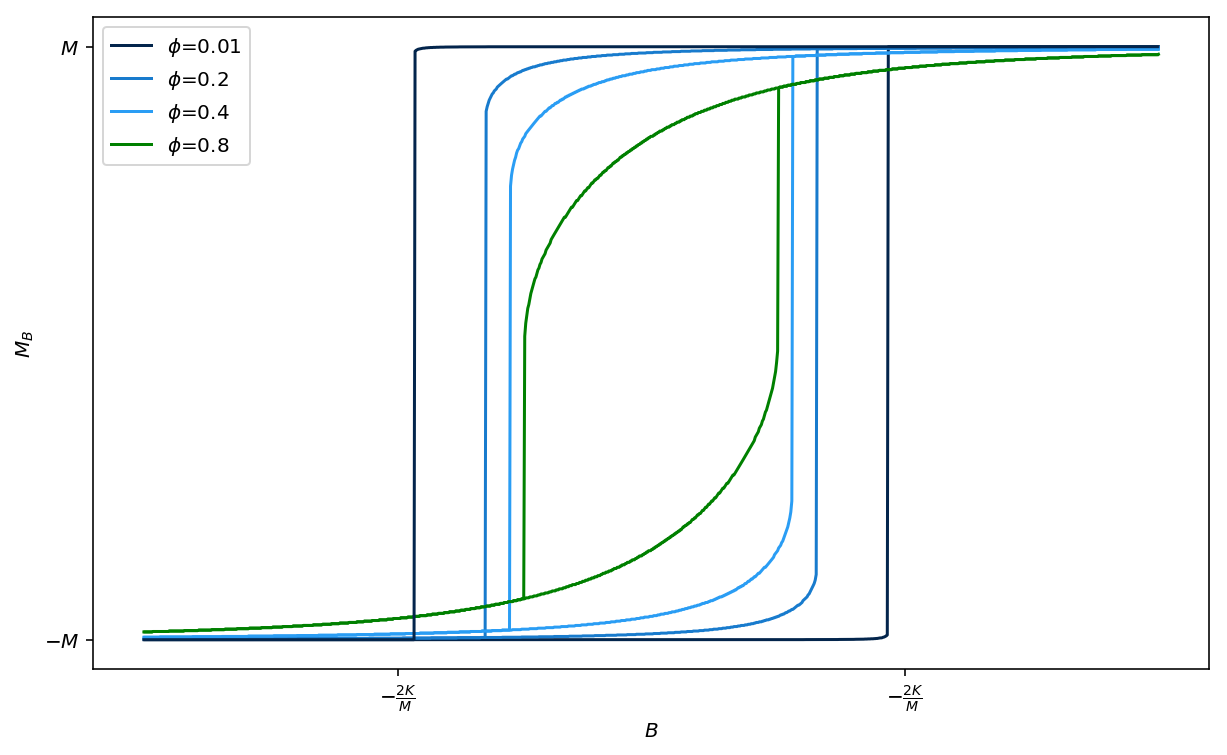

In [14]:
plt.figure(figsize=(10, 6))

myfunc(0.01, col='#03254c')


# myfunc(1.2, col='#1167b1')


myfunc(0.2, col='#187bcd')
myfunc(0.4, col='#2a9df4')
myfunc(0.8, col='green')

myfunc2(0.2, col='#187bcd')
myfunc2(0.4, col='#2a9df4')
myfunc2(0.8, col='green')
# myfunc2(1.2, col='#1167b1')
myfunc2(0.01, col='#03254c')


ax = plt.gca() 
# ax.set_xlim((0, 2*np.pi))
ax.set_yticks([-1,1])
ax.set_yticklabels([r'$-M$', r'$M$'])
 
ax.set_xticks([-2,2])
ax.set_xticklabels([r'$-\frac{2K}{M}$', r'$-\frac{2K}{M}$'])


plt.legend()
plt.xlabel(r"$B$")
plt.ylabel(r"$M_B$")



 